# Imports

#### Some imports are here as a legacy from the scarpe notebook.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time

## Load file with 2016 results
parse the times of secctions and finish as datetime

In [2]:
parser = lambda x: pd.to_datetime(x, format='%H:%M:%S', errors='coerce')

In [3]:
df = pd.read_csv('marathon_results_2016.csv', date_parser=parser, parse_dates=list(range(9,21)))

In [4]:
df.describe()

,Age,Overall,Gender,Division
count,26630.000000,26630.000000,26630.000000,26630.000000
mean,42.514044,13314.764176,6707.085242,1613.305896
std,11.347955,7687.226481,3928.246611,1443.420260
min,18.000000,1.000000,1.000000,1.000000
25%,34.000000,6658.250000,3329.000000,510.000000
50%,43.000000,13314.500000,6657.500000,1180.000000
75%,51.000000,19971.750000,9986.000000,2198.000000
max,83.000000,26629.000000,14463.000000,5946.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26630 entries, 0 to 26629
Data columns (total 24 columns):
Bib              26630 non-null object
Name             26630 non-null object
Age              26630 non-null int64
M/F              26630 non-null object
City             26629 non-null object
State            23783 non-null object
Country          26630 non-null object
Citizen          1122 non-null object
Unnamed: 8       83 non-null object
5K               26578 non-null datetime64[ns]
10K              26601 non-null datetime64[ns]
15K              26616 non-null datetime64[ns]
20K              26607 non-null datetime64[ns]
Half             26613 non-null datetime64[ns]
25K              26620 non-null datetime64[ns]
30K              26606 non-null datetime64[ns]
35K              26618 non-null datetime64[ns]
40K              26616 non-null datetime64[ns]
Pace             26630 non-null datetime64[ns]
Proj Time        26521 non-null datetime64[ns]
Official Time    26630 non-n

In [6]:
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,1900-01-01 00:15:47,...,1900-01-01 01:19:15,1900-01-01 01:34:17,1900-01-01 01:50:24,1900-01-01 02:05:59,1900-01-01 00:05:04,1900-01-01 02:12:45,1900-01-01 02:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,1900-01-01 00:15:47,...,1900-01-01 01:19:15,1900-01-01 01:34:17,1900-01-01 01:50:24,1900-01-01 02:05:59,1900-01-01 00:05:06,1900-01-01 02:13:32,1900-01-01 02:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,1900-01-01 00:15:46,...,1900-01-01 01:19:15,1900-01-01 01:34:45,1900-01-01 01:50:48,1900-01-01 02:06:47,1900-01-01 00:05:07,1900-01-01 02:14:02,1900-01-01 02:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,1900-01-01 00:15:46,...,1900-01-01 01:19:16,1900-01-01 01:34:45,1900-01-01 01:50:48,1900-01-01 02:06:47,1900-01-01 00:05:07,1900-01-01 02:14:05,1900-01-01 02:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,1900-01-01 00:15:46,...,1900-01-01 01:19:18,1900-01-01 01:34:46,1900-01-01 01:51:30,1900-01-01 02:08:11,1900-01-01 00:05:11,1900-01-01 02:15:45,1900-01-01 02:15:45,5,5,5


## Finishers by age

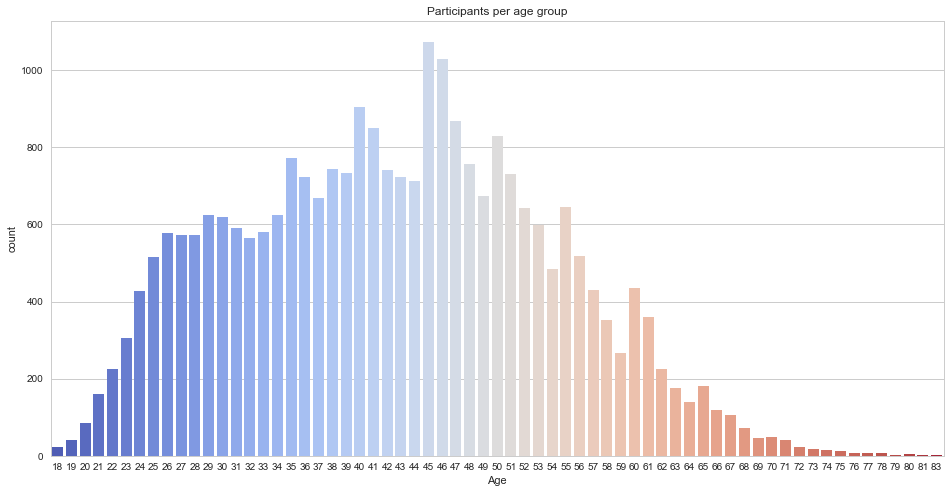

In [7]:
g = sns.countplot('Age', data=df, palette="coolwarm")
g.figure.set_size_inches(16,8)
g.set_title("Participants per age group")


### Finishers by age and gender

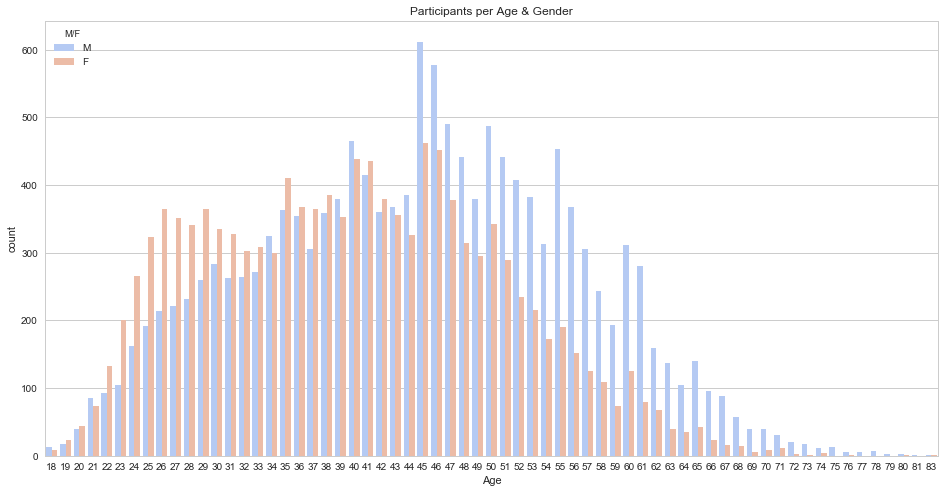

In [8]:
g = sns.countplot('Age', data=df, palette="coolwarm", hue='M/F')
g.figure.set_size_inches(16,8)
g.set_title("Participants per Age & Gender")

## Boxplot by age and gender

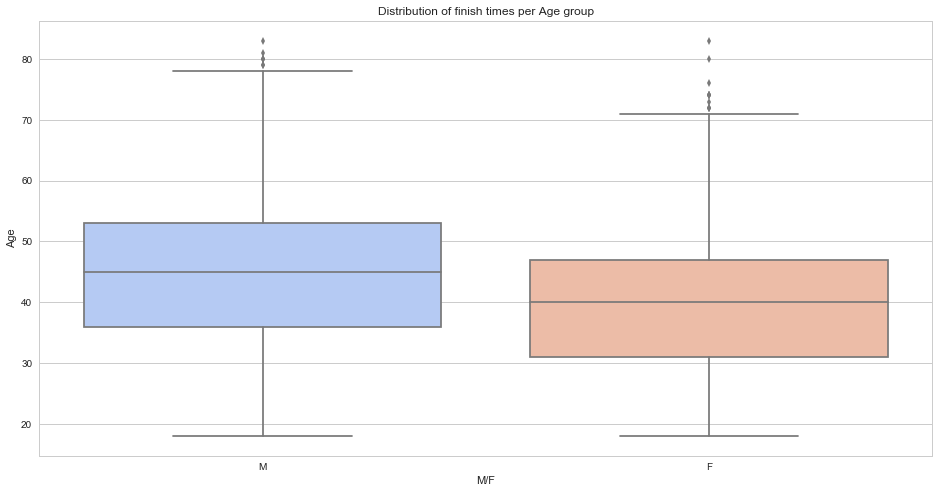

In [9]:
g = sns.boxplot(df['M/F'], df['Age'], palette="coolwarm")
g.figure.set_size_inches(16,8)
g.set_title("Distribution of finish times per Age group")

### Distribution of official times by age

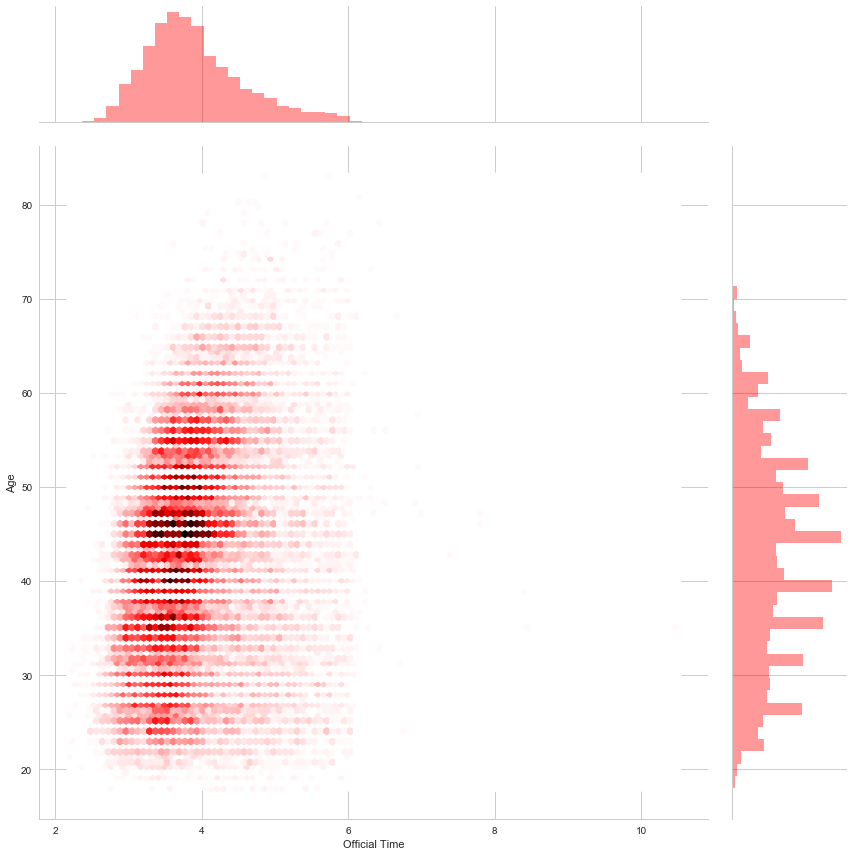

In [10]:
g = sns.jointplot((df['Official Time'].dt.minute/60 + df['Official Time'].dt.hour), df['Age'], stat_func=None, kind='hex', color="r", size=12)


### Boxplot of finishing times by age

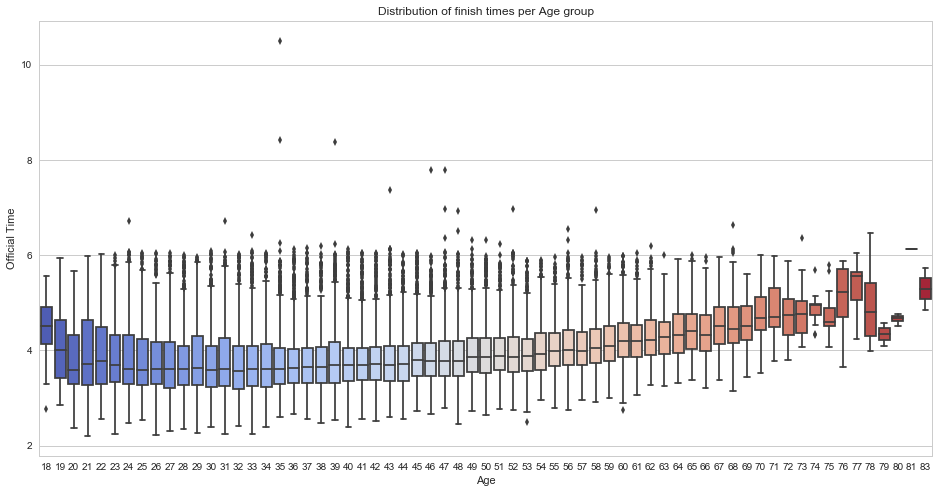

In [11]:
g = sns.boxplot(df['Age'], (df['Official Time'].dt.minute/60 + df['Official Time'].dt.hour), palette="coolwarm")
g.figure.set_size_inches(16,8)
g.set_title("Distribution of finish times per Age group")


### Overall placement by age and gender - probably useless...

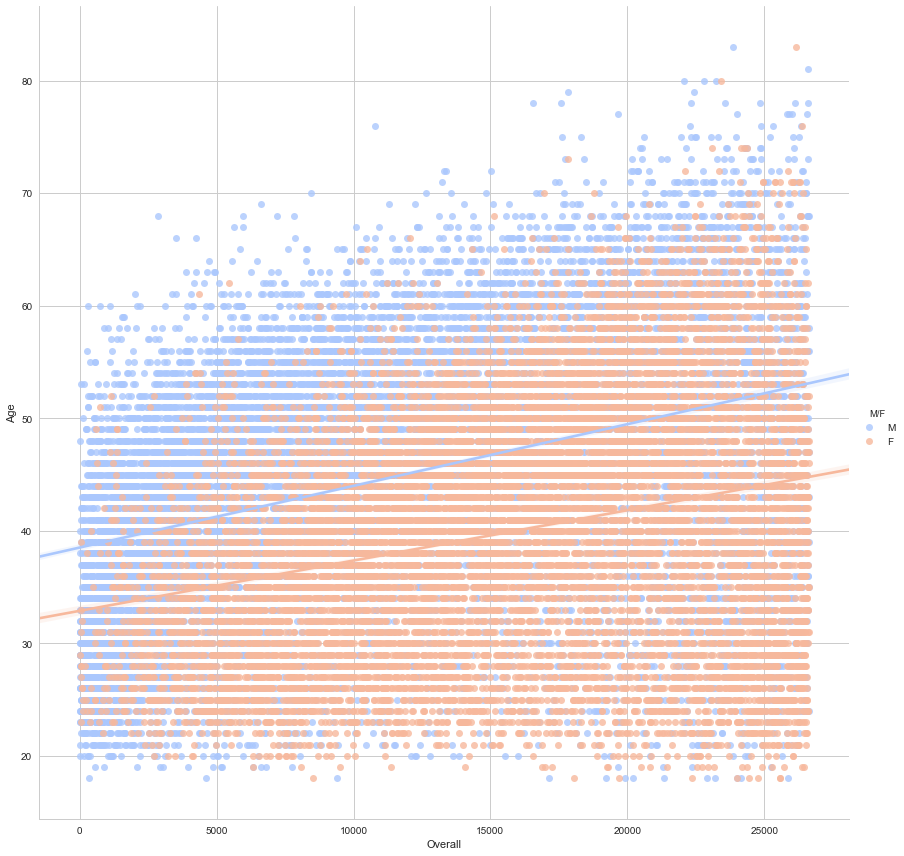

In [12]:
g = sns.lmplot(x='Overall', y='Age', data=df, hue='M/F', palette="coolwarm", size=12)


#### Separate the name column into first and last names

In [13]:
s = df['Name'].apply(lambda x: x.split(', '))
df['First Name'] = s.apply(lambda x: x[1])
df['Last Name'] = s.apply(lambda x: x[0])
df.drop('Name', axis=1, inplace=True)

## Most popular country - finishers

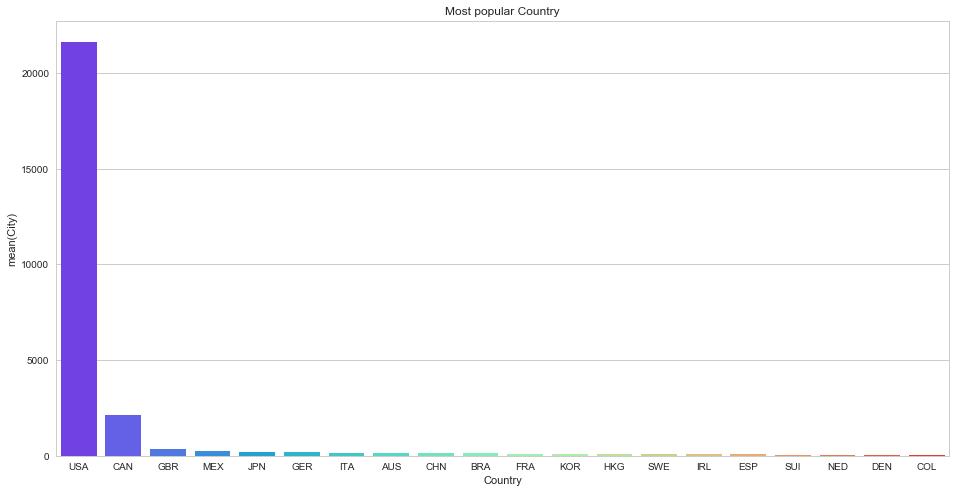

In [14]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Country")

### Most popular country without USA

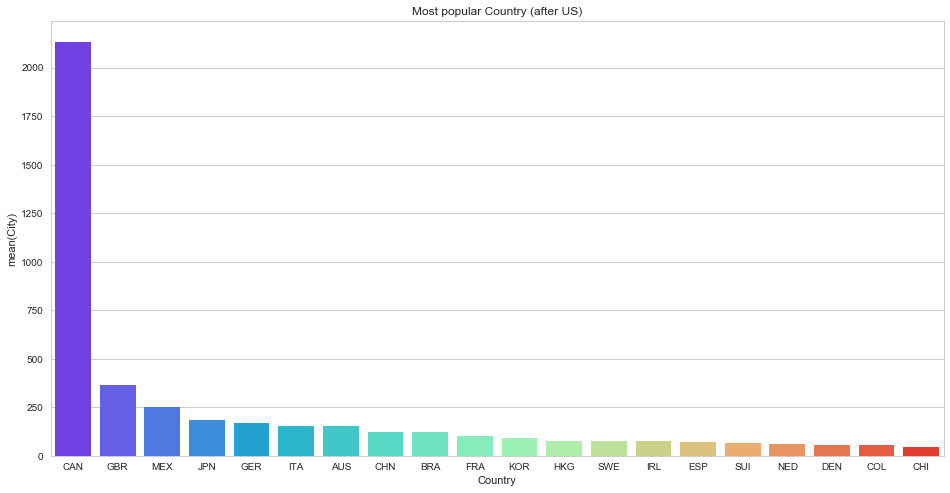

In [15]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(21)[1:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Country (after US)")

### most popular country without USA and Canada

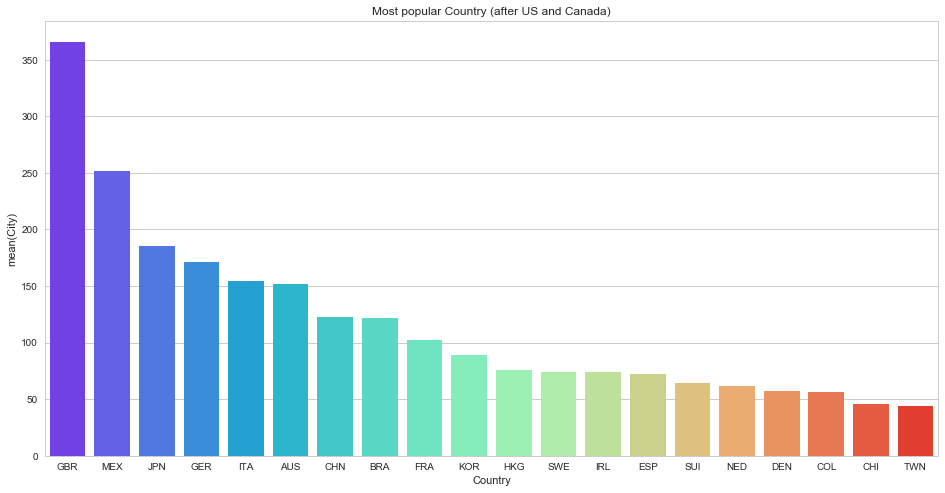

In [16]:
s = df.groupby('Country').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Country (after US and Canada)")

## Most popular city
required to check that the City is not null (one record has not city and crashes the kernel). Known bug that was supposed to be fixed with version .19 but it's not working here.

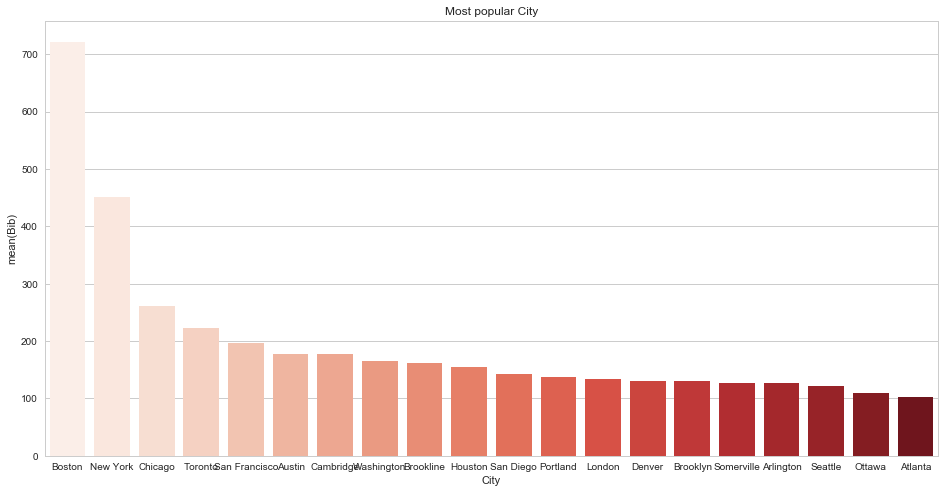

In [17]:
s = df[df['City'].notnull()].groupby('City').count()['Bib'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Reds')
g.figure.set_size_inches(16,8)
g.set_title("Most popular City")

## Most popular state
In the USA, there are some Canadian states that have more participants that some USA states

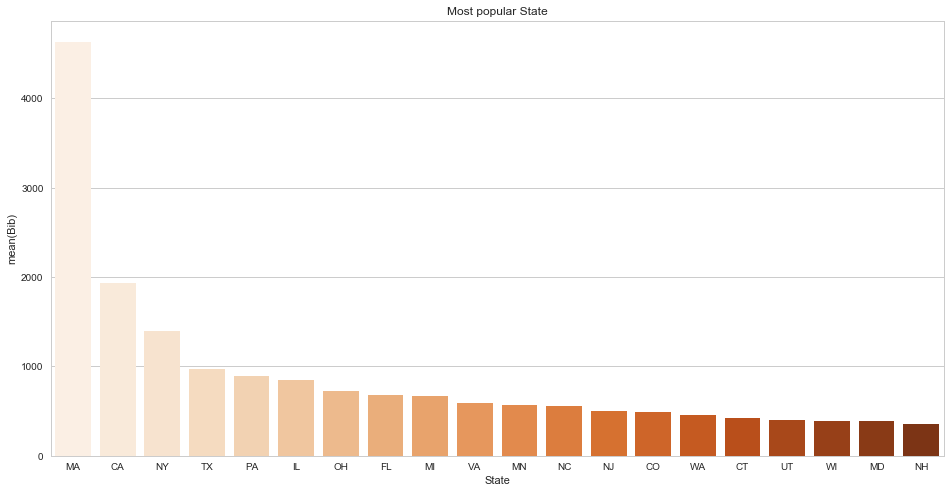

In [18]:
s = df[df['Country'] == 'USA'].groupby('State').count()['Bib'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette="Oranges")
g.figure.set_size_inches(16,8)
g.set_title("Most popular State")

## Most popular last name

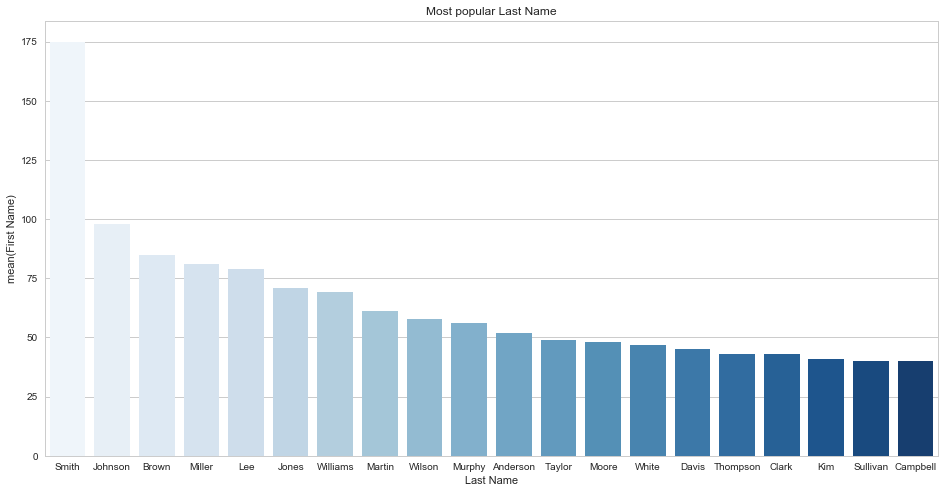

In [19]:
s = df.groupby('Last Name').count()['First Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Blues')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Last Name")

## Most popular first name

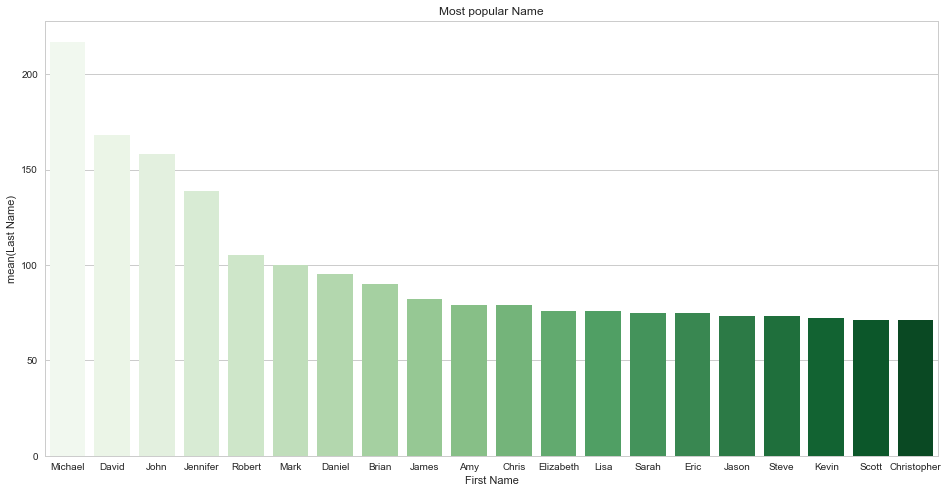

In [20]:
s = df.groupby('First Name').count()['Last Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Greens')
g.figure.set_size_inches(16,8)
g.set_title("Most popular Name")

### In progress... analysis of fist half vs second half...

In [21]:
df['Half_2'] = df['Official Time'] - df['Half']

In [22]:
df['Half_2'] = pd.to_datetime(df['Half_2'])

#### Not sure why I need to take this off from the Half_2 to make it right?

In [23]:
df["Half_2"] = df["Half_2"]-pd.to_timedelta(70, 'Y')-pd.to_timedelta(36, 'm')

#### Calculate the difference between the first and second half 

In [24]:
df['2nd_Split'] = (df['Half_2']-df["Half"])

In [25]:
df['2nd_Split']= df['2nd_Split'].apply(lambda x: x.total_seconds()/60)

#### Plot the differences.

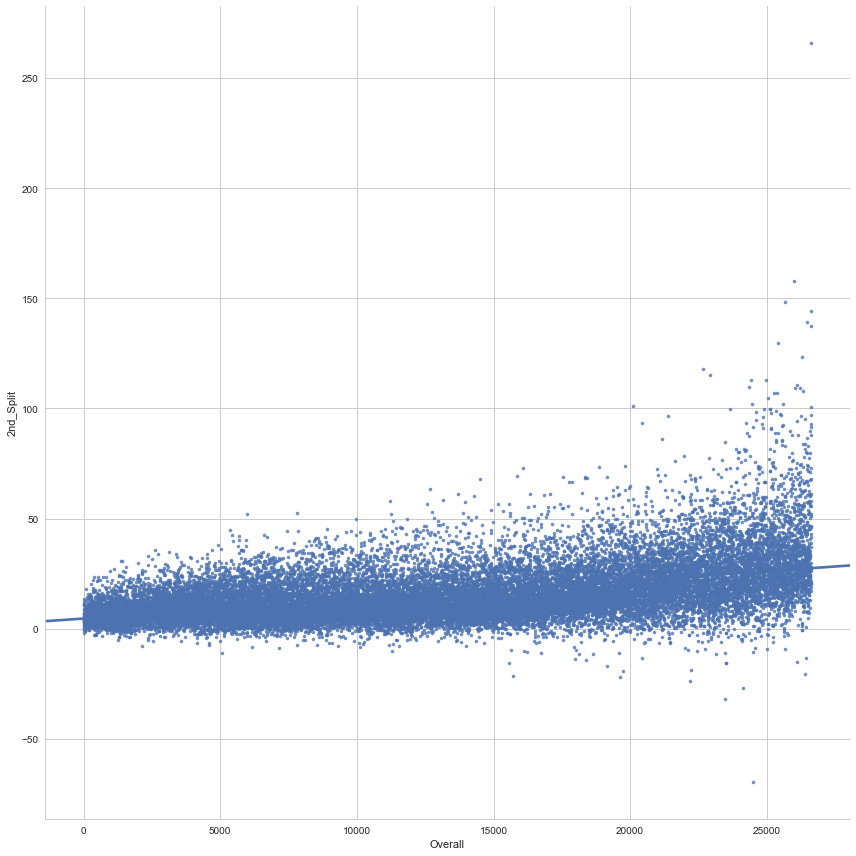

In [26]:
sns.lmplot(data=df, y='2nd_Split', x='Overall', size=12, markers='.')

#### Find the extreme cases of possitive split and negative split

In [27]:
df[df['2nd_Split'] == df['2nd_Split'].max()][['5K', '10K','15K', '20K', '25K', '30K', '35K', '40K']]

,5K,10K,15K,20K,25K,30K,35K,40K
26624,1900-01-01 00:20:58,1900-01-01 00:41:41,1900-01-01 01:02:29,1900-01-01 01:23:34,1900-01-01 01:45:00,1900-01-01 02:07:21,1900-01-01 02:31:21,1900-01-01 06:54:20


In [28]:
df[df['2nd_Split'] == df['2nd_Split'].max()]

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
26624,4358,43,M,Yardley,PA,USA,NaN,NaN,1900-01-01 00:20:58,1900-01-01 00:41:41,...,1900-01-01 00:16:53,1900-01-01 07:22:23,1900-01-01 07:22:23,26624,14461,1994,Steven J,Hall,1900-01-01 05:54:05,265.783333


In [29]:
df[df['2nd_Split'] == df['2nd_Split'].min()][['5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Division']]

,5K,10K,15K,20K,25K,30K,35K,40K,Division
24513,1900-01-01 00:22:00,1900-01-01 00:45:02,1900-01-01 01:22:46,1900-01-01 02:59:37,1900-01-01 03:27:32,1900-01-01 03:55:42,1900-01-01 04:21:36,1900-01-01 04:49:14,4503


In [30]:
df[df['2nd_Split'] == df['2nd_Split'].min()]

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
24513,6698,39,M,Byron Center,MI,USA,NaN,NaN,1900-01-01 00:22:00,1900-01-01 00:45:02,...,1900-01-01 00:11:29,1900-01-01 05:00:51,1900-01-01 05:00:51,24513,13588,4503,Brian R.,Cunningham,1900-01-01 01:55:39,-69.55


#### Find how many negative splits - faster second half than first half. (particularly difficult in Boston due to the Newton Hills)

In [31]:
df[df['2nd_Split'] < 0].sort_values(by='2nd_Split')

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
24513,6698,39,M,Byron Center,MI,USA,NaN,NaN,1900-01-01 00:22:00,1900-01-01 00:45:02,...,1900-01-01 00:11:29,1900-01-01 05:00:51,1900-01-01 05:00:51,24513,13588,4503,Brian R.,Cunningham,1900-01-01 01:55:39,-69.550000
23458,17816,30,F,Denver,CO,USA,NaN,NaN,1900-01-01 00:27:34,1900-01-01 00:54:31,...,1900-01-01 00:10:57,1900-01-01 04:46:53,1900-01-01 04:46:53,23458,10365,5042,Meaghan E,Mahoney,1900-01-01 02:07:25,-32.050000
24124,1566,38,M,Bellevue,WA,USA,NaN,NaN,1900-01-01 00:31:04,1900-01-01 01:06:21,...,1900-01-01 00:11:16,1900-01-01 04:55:13,1900-01-01 04:55:13,24124,13401,4450,Mathew J.,Hong,1900-01-01 02:14:07,-26.983333
22178,19021,40,F,Ogden,UT,USA,NaN,NaN,1900-01-01 00:30:38,1900-01-01 01:04:06,...,1900-01-01 00:10:25,1900-01-01 04:33:05,1900-01-01 04:33:05,22178,9697,1634,Danielle,Nielsen,1900-01-01 02:04:38,-23.816667
19639,5023,29,M,Bowling Green,KY,USA,NaN,NaN,1900-01-01 00:31:59,1900-01-01 01:06:29,...,1900-01-01 00:09:43,1900-01-01 04:14:43,1900-01-01 04:14:43,19639,11370,3952,David J,Croxton,1900-01-01 01:56:27,-21.816667
15702,25031,59,F,Hopkinton,MA,USA,NaN,NaN,1900-01-01 00:25:18,1900-01-01 00:51:28,...,1900-01-01 00:09:01,1900-01-01 03:56:00,1900-01-01 03:56:00,15702,5943,88,Catherine L,Howe,1900-01-01 01:47:18,-21.400000
26399,276,39,M,Kailua,HI,USA,NaN,NaN,1900-01-01 00:43:56,1900-01-01 01:27:49,...,1900-01-01 00:13:30,1900-01-01 05:53:42,1900-01-01 05:53:42,26399,14371,4772,Michael,Arnstein,1900-01-01 02:46:36,-20.500000
19755,26442,23,M,East Boston,MA,USA,NaN,NaN,1900-01-01 00:35:14,1900-01-01 01:06:38,...,1900-01-01 00:09:45,1900-01-01 04:15:26,1900-01-01 04:15:26,19755,11423,3971,Robert,Durben,1900-01-01 01:58:04,-19.300000
22244,16691,58,M,Mesa,AZ,USA,NaN,NaN,1900-01-01 00:28:41,1900-01-01 01:02:24,...,1900-01-01 00:10:27,1900-01-01 04:33:47,1900-01-01 04:33:47,22244,12514,1332,Jeffrey A,Donnelly,1900-01-01 02:07:36,-18.583333
19146,9113,45,M,Dubuque,IA,USA,NaN,NaN,1900-01-01 00:31:52,1900-01-01 01:08:33,...,1900-01-01 00:09:37,1900-01-01 04:11:55,1900-01-01 04:11:55,19146,11161,2087,Curt,Ehlinger,1900-01-01 01:57:36,-16.716667


In [32]:
(len(df[df['2nd_Split'] < 0].sort_values(by='2nd_Split'))/len(df))*100

2.5535110777318812

Only 2.55% (680 finishers) of the finishers have a negative split.

#### Find the ones that have identical first half and second half

In [33]:
df[df['2nd_Split']== 0].sort_values(by='2nd_Split')

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
1,1,26,M,Ambo,NaN,ETH,NaN,NaN,1900-01-01 00:15:47,1900-01-01 00:31:21,...,1900-01-01 00:05:06,1900-01-01 02:13:32,1900-01-01 02:13:32,2,2,2,Lelisa,Desisa,1900-01-01 01:06:46,0.0
1397,7257,46,M,Lakewood,CO,USA,NaN,NaN,1900-01-01 00:21:18,1900-01-01 00:42:41,...,1900-01-01 00:06:52,1900-01-01 02:59:38,1900-01-01 02:59:38,1398,1317,109,Monte,Merz,1900-01-01 01:29:49,0.0
4621,16374,43,F,Seattle,WA,USA,NaN,NaN,1900-01-01 00:23:08,1900-01-01 00:46:01,...,1900-01-01 00:07:35,1900-01-01 03:18:36,1900-01-01 03:18:36,4622,620,72,Anne,Theisen,1900-01-01 01:39:18,0.0
7045,16576,53,F,Sellersburg,IN,USA,NaN,NaN,1900-01-01 00:24:15,1900-01-01 00:49:04,...,1900-01-01 00:07:56,1900-01-01 03:27:50,1900-01-01 03:27:50,7045,1406,37,Rachel A,Parrella,1900-01-01 01:43:55,0.0
7398,19409,39,F,Santa Barbara,CA,USA,NaN,NaN,1900-01-01 00:24:51,1900-01-01 00:49:23,...,1900-01-01 00:07:59,1900-01-01 03:28:54,1900-01-01 03:28:54,7398,1548,1236,Jennifer,Miller,1900-01-01 01:44:27,0.0
11607,20707,43,F,Joppa,MD,USA,NaN,NaN,1900-01-01 00:25:51,1900-01-01 00:52:08,...,1900-01-01 00:08:30,1900-01-01 03:42:26,1900-01-01 03:42:26,11607,3574,574,Stacey,Esposito,1900-01-01 01:51:13,0.0


Only 6 finishers have identical split times (quite rare)

### Calculations of pace at different stages of the race.

#### Fastest pace recorded in every 5K segment

In [34]:
print(((df['5K'] - datetime.strptime('00:00:00', '%H:%M:%S'))/3.1).min())
print(((df['10K'] -df['5K'])/3.1).min())
print(((df['15K'] -df['10K'])/3.1).min())
print(((df['20K'] -df['15K'])/3.1).min())
print(((df['25K'] -df['20K'])/3.1).min())
print(((df['30K'] -df['25K'])/3.1).min())
print(((df['35K'] -df['30K'])/3.1).min())
print(((df['40K'] -df['35K'])/3.1).min())

0 days 00:05:05.161290
0 days 00:04:45.161290
0 days 00:05:05.161290
0 days 00:05:11.612903
0 days 00:05:10
0 days 00:04:50.967741
0 days 00:05:10.645161
0 days 00:05:01.612903


##### This person has not time recorded at any point but the end...?

It is the only one that has all segments missing

In [35]:
df[(df['5K'].isnull() & df['10K'].isnull() & df['15K'].isnull() & df['20K'].isnull() & df['25K'].isnull()
   & df['30K'].isnull() & df['35K'].isnull() & df['40K'].isnull())]

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
2334,7513,43,M,Aurora,ON,CAN,CHN,NaN,NaT,NaT,...,1900-01-01 00:07:08,NaT,1900-01-01 03:06:45,2335,2157,336,Wei,Zhang,NaT,NaN


In [36]:
df[(df['5K'].isnull() & df['10K'].isnull() & df['15K'].isnull() & df['20K'].isnull() & df['Half'].isnull())]

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,10K,...,Pace,Proj Time,Official Time,Overall,Gender,Division,First Name,Last Name,Half_2,2nd_Split
2334,7513,43,M,Aurora,ON,CAN,CHN,NaN,NaT,NaT,...,1900-01-01 00:07:08,NaT,1900-01-01 03:06:45,2335,2157,336,Wei,Zhang,NaT,NaN
8204,17345,21,F,Woodsboro,MD,USA,NaN,NaN,NaT,NaT,...,1900-01-01 00:08:05,1900-01-01 03:31:40,1900-01-01 03:31:40,8204,1881,1486,Erin,Hub,NaT,NaN
